# Logistic Regression with Python

We will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

This data set contains the following features:

* 'PassengerId': contains the Passenger ID
* 'Survived': whether the passenger survived or not
* 'Pclass': the boarding class of the passenger
* 'Name': Name of the passenger
* 'Sex': Sex of the passenger
* 'Age': Age of the passenger
* 'SibSp': whether the passenger has sibling or spouse
* 'Parch': whether the passenger parent or children
* 'Ticket': the ticket number of passenger
* 'Fare': Fare of the ticket
* 'Cabin': Cabin number associated to the passenger
* 'Embarked': where the passenger mounted from

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sb

In [2]:
# Read Data
dataframe = pd.read_csv("/Users/devangpapinwar/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv")

In [3]:
# Get Data
print(dataframe)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [4]:
# Info of the Data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# First 5 set of data
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Checking if the Dataset contains any null values
dataframe.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# Data Analysis

<AxesSubplot:>

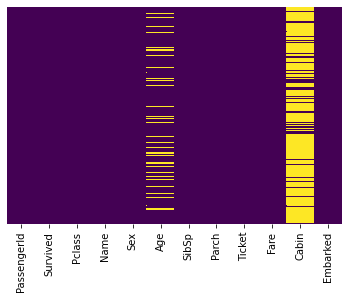

In [7]:
# Heatmap showing the null values of all the columns
sb.heatmap(dataframe.isnull() , yticklabels= False, cbar= False , cmap="viridis")

<AxesSubplot:xlabel='Survived', ylabel='count'>

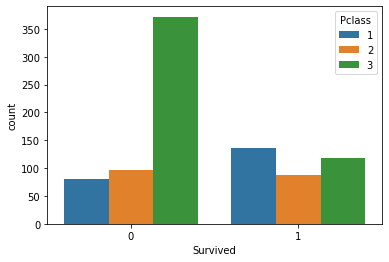

In [8]:
# Graph of Survivors based on the boarding class they were from
sb.countplot(x= "Survived", hue="Pclass" , data= dataframe)

<AxesSubplot:xlabel='Survived', ylabel='count'>

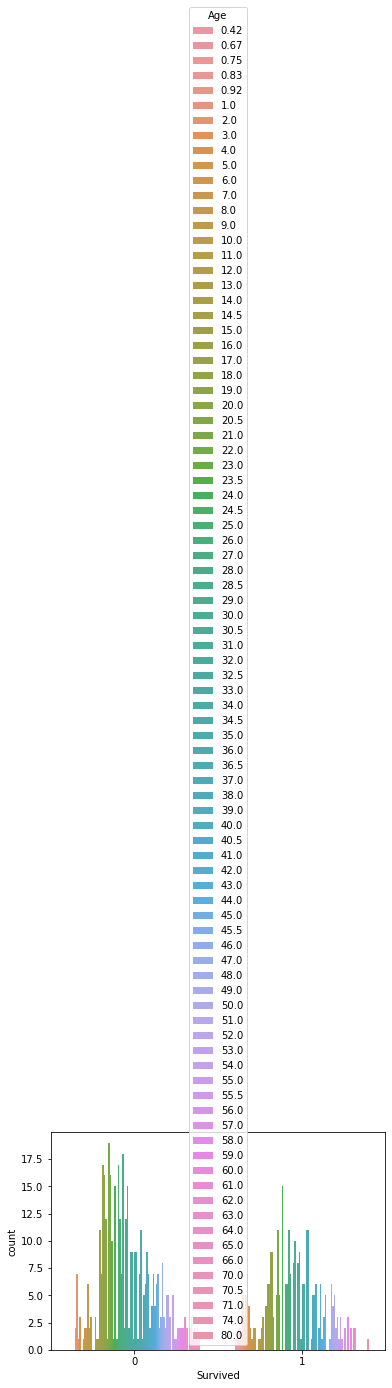

In [9]:
# Survivor Graph according to the Age of the people
sb.countplot(x= "Survived", hue="Age" , data= dataframe)

<AxesSubplot:xlabel='Survived', ylabel='count'>

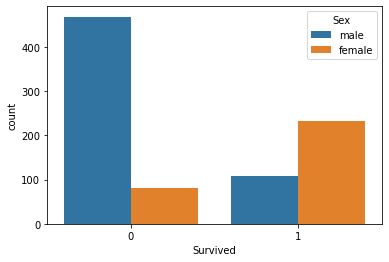

In [10]:
# Survivors based on the Sex 
sb.countplot(x= "Survived", hue="Sex" , data= dataframe)

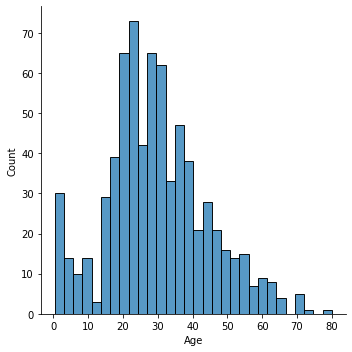

In [11]:
# Age of Survivors dropping the null values
sb.displot(dataframe["Age"].dropna() , kde = False , bins = 30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

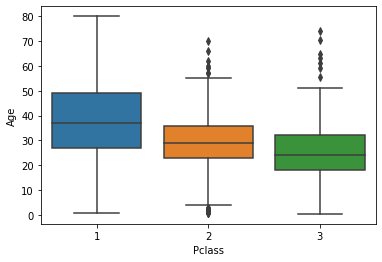

In [12]:
# Checking the correlation of Age of a person and the boarding class they had  
sb.boxplot(x="Pclass" , y="Age" , data=dataframe)

In [13]:
# Function to assign Age where there is no Age based upon the average data as we can predict the average age of people based on the class of board pass they had
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
# Appl the function on all the sets of Age and assign it to the ones where there is no age
dataframe["Age"] = dataframe[['Age' , 'Pclass']].apply(impute_age , axis= 1)

<AxesSubplot:>

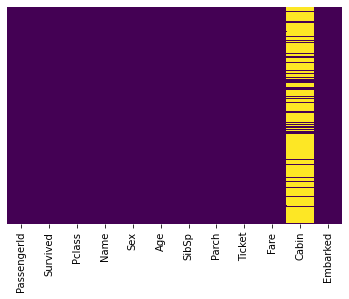

In [15]:
# Checking for the remainign type of null data
sb.heatmap(dataframe.isnull() , yticklabels= False, cbar= False , cmap="viridis")

In [16]:
# As we dont have sufficient data to predict the Cabin Number so we just drop the entire column
dataframe.drop("Cabin" , axis = 1 , inplace= True)

<AxesSubplot:>

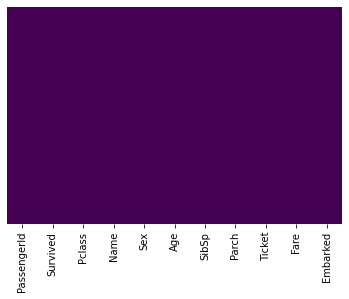

In [17]:
# We clearly dont have any null values left in our Dataframe 
sb.heatmap(dataframe.isnull() , yticklabels= False, cbar= False , cmap="viridis")

But we still dont have any discrete values in our dataframe that will help us validate our binary predictions or classifications . So we them dummy binary values to test against to perform classification


In [18]:
sex = pd.get_dummies(dataframe["Sex"] , drop_first= True)
sex
embark = pd.get_dummies(dataframe["Embarked"] , drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [19]:
dataframe = pd.concat([dataframe,sex,embark] , axis = 1)

In [20]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [21]:
# Remove the Non-Numerical data as it is not ideal for Machine Learning Algorithms 
dataframe.drop(["Sex" , "Embarked" ,"Name" , "Ticket"] , axis=1 , inplace= True)

In [22]:
dataframe.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [23]:
# We drop the PassengerID because even though it is Numerical we cant really perform any operation using this ID given the fact that we already have a ID
dataframe.drop(["PassengerId"] , axis=1 , inplace= True)

In [24]:
dataframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression

In [25]:
# As we have to predict the Survivors we split the data into two parts with just the survivor data and w/o the survivor data
X = dataframe.drop("Survived" , axis=1)
y = dataframe["Survived"]

print(X , y)

     Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         3  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         3  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  1
4         3  35.0      0      0   8.0500     1  0  1
..      ...   ...    ...    ...      ...   ... .. ..
886       2  27.0      0      0  13.0000     1  0  1
887       1  19.0      0      0  30.0000     0  0  1
888       3  24.0      1      2  23.4500     0  0  1
889       1  26.0      0      0  30.0000     1  0  0
890       3  32.0      0      0   7.7500     1  1  0

[891 rows x 8 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
# Split the Dataframe into Training and Testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataframe.drop("Survived",axis=1), dataframe["Survived"], test_size=0.30, random_state=101)

In [27]:
# Instantiate the Logistic Regression model and then and the Training data in the model to predict the Testing data off of it
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import classification_report

print("Classification Report : \n" , classification_report(y_test , predictions))

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [29]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix : \n" , confusion_matrix(y_test , predictions))

Confusion Matrix : 
 [[133  21]
 [ 38  76]]
